In [4]:
import numpy as np
import matplotlib.pyplot as plt

Basico de Transformaciones de fourier y la transformacion de Fourier

In [48]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[1:n]

u=np.exp(-(x**2))
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)
fre=np.linspace(-63,63,127)

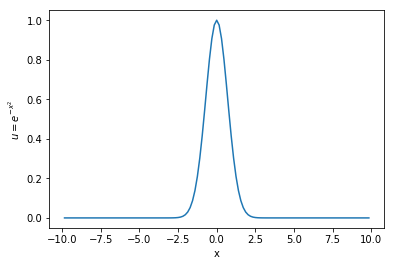

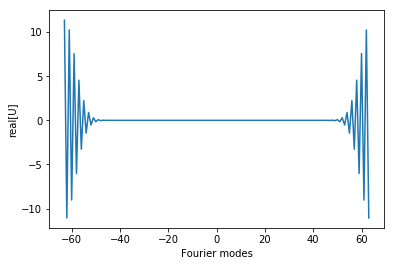

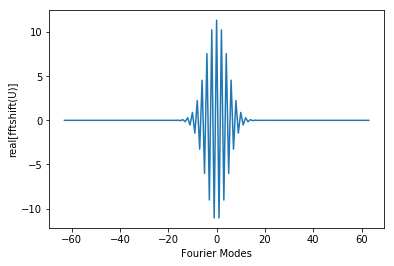

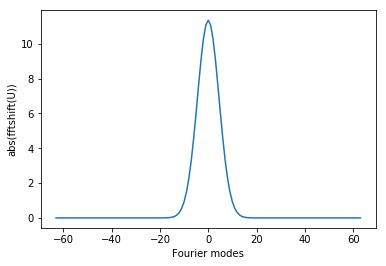

In [49]:
plt.plot(x,u)
plt.xlabel('x')
plt.ylabel('$u=e^{-x^2}$')
plt.show()
plt.plot(fre,np.real(ut))
plt.xlabel('Fourier modes')
plt.ylabel('real[U]')
plt.show()
plt.plot(fre,np.real(utshift))
plt.xlabel('Fourier Modes') 
plt.ylabel('real[fftshift(U)]')
plt.show()
plt.plot(fre,np.abs(utshift))
plt.xlabel('Fourier modes')
plt.ylabel('abs(fftshift(U))')
plt.show()

In [63]:
L=20
n=128

x2=np.linspace(-L/2,L/2,n+1)
x=x2[1:n]
dx=x[1]-x[0]
u=1/(np.cosh(x))
ut=np.fft.fft(u)

k=2*np.pi/L*np.asarray(list(range(0,int(n/2)))+list(range(int(-n/2+1),0)))
ut1=1.0j*k*ut # primera derivada
ut2=-k*k*ut #Segunda derivada
u1=np.real(np.fft.ifft(ut1))
u2=np.real(np.fft.ifft(ut2))
u1exact=-1/np.cosh(x)*np.tanh(x)
u2exact=1/np.cosh(x)-2/(np.cosh(x)**3)
len(u)
#segundo orden
ux=[None]*(n-1)
ux[0]=(-3*u[0]+4*u[1]-u[2])/(2*dx)

for j in range(1,n-2):
    ux[j]=(u[j+1]-u[j-1])/(2*dx)
    
ux[n-2]=(3*u[n-2]-4*u[n-3])/(2*dx)

# Cuarto orden 
ux2=[None]*len(ux)
ux2[0]=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2[1]=(-3*u[1]+4*u[2]-u[3])/(2*dx)

for j in range(2,n-3):
    ux2[j]=(-u[j+2]+8*u[(j+1)]-8*u[(j-1)]+u[j-2])/(12*dx)
ux2[n-3]=(3*u[n-3]-4*u[n-4]+u[n-5])/(2*dx)
ux2[n-2]=(3*u[n-2]-4*u[n-3]+u[n-4])


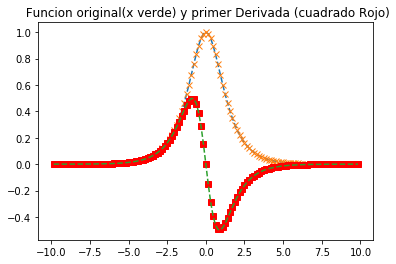

In [51]:
plt.plot(x,u,'--',x,np.real(np.fft.ifft(ut)),'x',x,u1,'rs ',x,u1exact,'--')
plt.title(' Funcion original(x verde) y primer Derivada (cuadrado Rojo)')
plt.show()

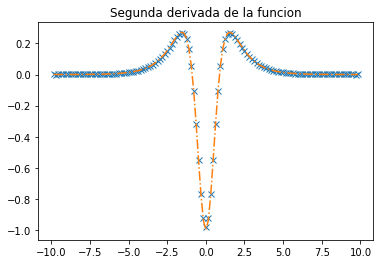

In [52]:
plt.plot(x,u2,'x',x,u2exact,'-.')
plt.title('Segunda derivada de la funcion')
plt.show()

In [53]:
# 12.2 Aplicacion en la detecion y el filtro de Radares

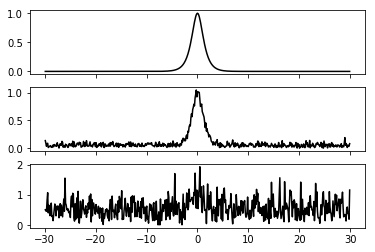

In [86]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[1:n]
k=(2*np.pi/(2*L))*np.asarray(list(range(0,int(n/2)))+list(range(int(-n/2+1),0)))

u=1/np.cosh(t)

#Noise 1
noise=1
ut=np.fft.fft(u)
utn=ut+noise*(np.random.normal(size=(n-1))+1.0j*np.random.normal(size=(n-1)))
un=np.fft.ifft(utn)
# Noise 2
noise=10
utn2=ut+noise*(np.random.normal(size=(n-1))+1.0j*np.random.normal(size=(n-1)))
un2=np.fft.ifft(utn2)
f,(ax1,ax2,ax3)=plt.subplots(3,sharex=True)
ax1.plot(t,u,'k')
ax2.plot(t,np.abs(un),'k')
ax3.plot(t,np.abs(un2),'k')
plt.show()


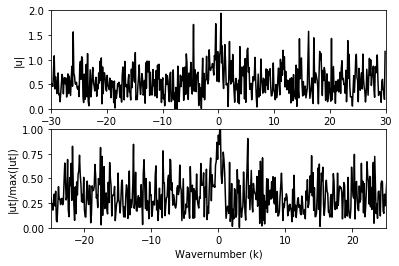

In [90]:
f,(ax1,ax2)=plt.subplots(2,sharex=False)
ax1.plot(t,abs(un2),'k')
ax1.set_xlabel('time(t)')
ax1.set_ylabel('|u|')
ax1.set_xlim(-30,30)
ax1.set_ylim(0,2)
ax2.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn2))/max(np.abs(np.fft.fftshift(utn2))),'k')
ax2.set_xlabel('Wavernumber (k)')
ax2.set_ylabel('|ut|/max(|ut|)')
ax2.set_xlim(-25,25)
ax2.set_ylim(0,1)
plt.show()

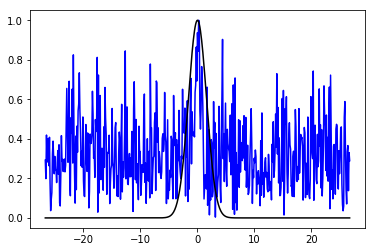

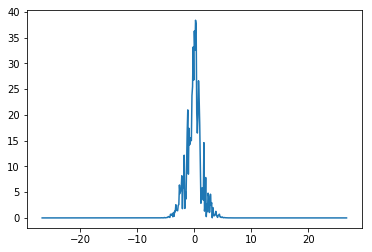

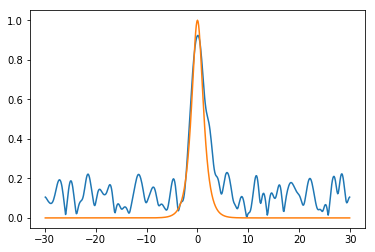

In [99]:
filt=np.exp(-0.2*(k)**2)
unft=filt*utn2
unf=np.fft.ifft(unft)

plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn2))/max(np.abs(np.fft.fftshift(utn2))),'b',np.fft.fftshift(k),np.fft.fftshift(filt),'k')
plt.show()
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft)))
plt.show()
plt.plot(t,abs(unf),t,u)
plt.show()


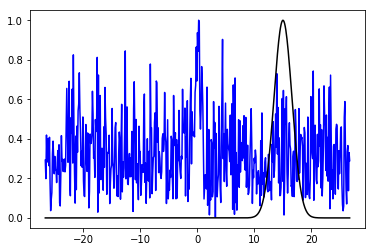

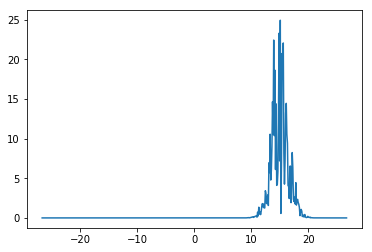

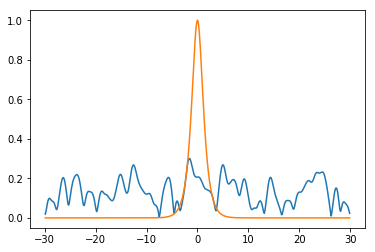

In [102]:
filt=np.exp(-0.2*(k-15)**2)
unft=filt*utn2
unf=np.fft.ifft(unft)

plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn2))/max(np.abs(np.fft.fftshift(utn2))),'b',np.fft.fftshift(k),np.fft.fftshift(filt),'k')
plt.show()
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft)))
plt.show()
plt.plot(t,abs(unf),t,u)
plt.show()

# Seccion 12.3

In [111]:
L=30
n=512
t2 = np.linspace(-L,L,n+1)
t=t2[1:n]
k=2*np.pi/(2*L)*np.asarray((list(range(0,n//2))+list(range(-n//2+1,0))))
noise=10